Group 16 - Project 2

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Task 1

## Uploading data

In [2]:
walking_chest = []
walking_head = []
running_chest = []
running_head = []
climbingup_chest = []
climbingup_head = []
climbingdown_chest = []
climbingdown_head = []

The data is extracted from the original zip files from the source and manually renamed with a number corresponding to each subject, and then repacked into a single zip file. This helps us read the csv files into DataFrames easily in a single loop.

Please extract the zip file supplied in this project submission and import/upload all csv files.

In [3]:
from google.colab import files
uploaded = files.upload()

Saving acc_climbingdown_chest_1.csv to acc_climbingdown_chest_1.csv
Saving acc_climbingdown_chest_2.csv to acc_climbingdown_chest_2.csv
Saving acc_climbingdown_chest_3.csv to acc_climbingdown_chest_3.csv
Saving acc_climbingdown_chest_4.csv to acc_climbingdown_chest_4.csv
Saving acc_climbingdown_chest_5.csv to acc_climbingdown_chest_5.csv
Saving acc_climbingdown_chest_6.csv to acc_climbingdown_chest_6.csv
Saving acc_climbingdown_chest_7.csv to acc_climbingdown_chest_7.csv
Saving acc_climbingdown_chest_8.csv to acc_climbingdown_chest_8.csv
Saving acc_climbingdown_chest_9.csv to acc_climbingdown_chest_9.csv
Saving acc_climbingdown_chest_10.csv to acc_climbingdown_chest_10.csv
Saving acc_climbingdown_chest_11.csv to acc_climbingdown_chest_11.csv
Saving acc_climbingdown_chest_12.csv to acc_climbingdown_chest_12.csv
Saving acc_climbingdown_chest_13.csv to acc_climbingdown_chest_13.csv
Saving acc_climbingdown_chest_14.csv to acc_climbingdown_chest_14.csv
Saving acc_climbingdown_chest_15.csv t

In [4]:
for i in range(1, 16):
  walking_chest.append(pd.read_csv(f'acc_walking_chest_{i}.csv'))
  walking_head.append(pd.read_csv(f'acc_walking_head_{i}.csv'))
  running_chest.append(pd.read_csv(f'acc_running_chest_{i}.csv'))
  running_head.append(pd.read_csv(f'acc_running_head_{i}.csv'))
  climbingup_chest.append(pd.read_csv(f'acc_climbingup_chest_{i}.csv'))
  climbingup_head.append(pd.read_csv(f'acc_climbingup_head_{i}.csv'))
  climbingdown_chest.append(pd.read_csv(f'acc_climbingdown_chest_{i}.csv'))
  climbingdown_head.append(pd.read_csv(f'acc_climbingdown_head_{i}.csv'))

In [ ]:
walking_chest[0]

In [ ]:
climbingup_head[14]

## Visible graph methods and results

In [7]:
!pip install ts2vg
!pip install igraph
!pip install pycairo
!pip install cairocffi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.9 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 344 kB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.5 MB/s 
  Created wheel for cairocffi: filename=cairocff

In [8]:
import ts2vg

Calculate the visible graphs and append the result to a table. 720 rows in total (15 subjects x 4 activities x 2 signal positions x 3 dimensions x 2 methods).

Expect long execution time (~ 1 minute)

In [9]:
activity_features = []

for i in range(15):
  for attr in ['x', 'y', 'z']:
    for activity in [walking_head, walking_chest, running_head, running_chest, climbingup_head, climbingup_chest, climbingdown_head, climbingdown_chest]:
      # Horizontal visible graph
      row_h = []
      h = ts2vg.HorizontalVG()
      h.build(activity[i][f'attr_{attr}'][1000:2024])
      ig_h = h.as_igraph()
      #print('Number of Nodes:',ig_h.vcount())
      #print('Number of Links:',ig_h.ecount())
      #print('Average Degree:',np.mean(ig_h.degree()))
      #print('Network Diameter:',ig_h.diameter())
      #print('Average Path Length:',ig_h.average_path_length())
      row_h.append('HVG')
      row_h.append(i+1)
      row_h.append(attr)
      row_h.append(np.mean(ig_h.degree()))
      row_h.append(ig_h.diameter())
      row_h.append(ig_h.average_path_length())
      if activity is walking_chest or activity is running_chest or activity is climbingup_chest or activity is climbingdown_chest:
        row_h.append("Chest")
      else:
        row_h.append("Head")
      if activity is walking_chest or activity is walking_head:
        row_h.append("Walking")
      elif activity is running_chest or activity is running_head:
        row_h.append("Running")
      elif activity is climbingup_chest or activity is climbingup_head:
        row_h.append("Climbing Up")
      else:
        row_h.append("Climbing Down")
      activity_features.append(row_h.copy())
      # Natural visible graph
      row_n = []
      n = ts2vg.NaturalVG()
      n.build(activity[i][f'attr_{attr}'][1000:2024])
      ig_n = n.as_igraph()
      row_n.append('NVG')
      row_n.append(i+1)
      row_n.append(attr)
      row_n.append(np.mean(ig_n.degree()))
      row_n.append(ig_n.diameter())
      row_n.append(ig_n.average_path_length())
      if activity is walking_chest or activity is running_chest or activity is climbingup_chest or activity is climbingdown_chest:
        row_n.append("Chest")
      else:
        row_n.append("Head")
      if activity is walking_chest or activity is walking_head:
        row_n.append("Walking")
      elif activity is running_chest or activity is running_head:
        row_n.append("Running")
      elif activity is climbingup_chest or activity is climbingup_head:
        row_n.append("Climbing Up")
      else:
        row_n.append("Climbing Down")
      activity_features.append(row_n.copy())

In [ ]:
activity_features

In [10]:
pd_activity_features = pd.DataFrame(activity_features, columns=['Method', 'Subject', 'Accelerometer axis', 'Average Degree', 'Network Diameter', 'Average Path Length', 'Signal Position', 'Activity'])
pd_activity_features

,Method,Subject,Accelerometer axis,Average Degree,Network Diameter,Average Path Length,Signal Position,Activity
0,HVG,1,x,3.949219,35,16.403747,Head,Walking
1,NVG,1,x,12.492188,11,4.518703,Head,Walking
2,HVG,1,x,3.958984,26,11.578024,Chest,Walking
3,NVG,1,x,11.451172,10,4.441492,Chest,Walking
4,HVG,1,x,3.953125,31,10.856393,Head,Running
...,...,...,...,...,...,...,...,...
715,NVG,15,z,10.123047,10,4.766421,Chest,Climbing Up
716,HVG,15,z,3.939453,39,16.957489,Head,Climbing Down
717,NVG,15,z,11.107422,10,4.887433,Head,Climbing Down
718,HVG,15,z,3.941406,32,11.783465,Chest,Climbing Down


## Scatter plots: average degree vs network diameter for walking and running

In [11]:
pd_walking_running = pd_activity_features.loc[(pd_activity_features['Activity'] == 'Walking') | (pd_activity_features['Activity'] == 'Running')]
pd_walking_running

,Method,Subject,Accelerometer axis,Average Degree,Network Diameter,Average Path Length,Signal Position,Activity
0,HVG,1,x,3.949219,35,16.403747,Head,Walking
1,NVG,1,x,12.492188,11,4.518703,Head,Walking
2,HVG,1,x,3.958984,26,11.578024,Chest,Walking
3,NVG,1,x,11.451172,10,4.441492,Chest,Walking
4,HVG,1,x,3.953125,31,10.856393,Head,Running
...,...,...,...,...,...,...,...,...
707,NVG,15,z,9.318359,12,4.945985,Chest,Walking
708,HVG,15,z,3.964844,21,10.148143,Head,Running
709,NVG,15,z,8.447266,11,4.786348,Head,Running
710,HVG,15,z,3.974609,20,9.290619,Chest,Running


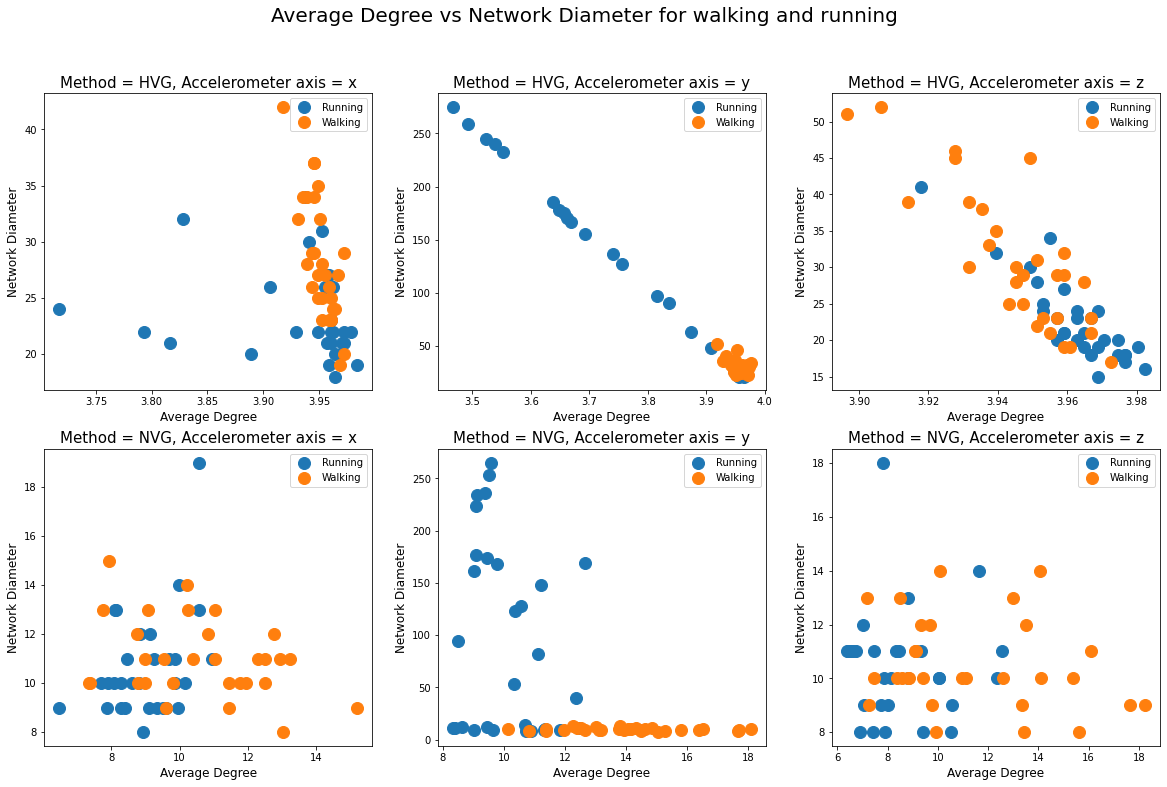

In [38]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 12)
fig.suptitle('Average Degree vs Network Diameter for walking and running', fontsize=20)

method = ['HVG', 'NVG']
attr = ['x', 'y', 'z']

for i in range(2):
  for j in range(3):
    df_temp = pd_walking_running.loc[(pd_walking_running['Method'] == method[i]) & (pd_walking_running['Accelerometer axis'] == attr[j])]
    groups = df_temp.groupby('Activity')
    for name, group in groups:
      axs[i, j].plot(group['Average Degree'], group['Network Diameter'], marker='o', linestyle='', markersize=12, label=name)
    #axs[i, j].scatter(x=df_temp['Average Degree'], y=df_temp['Network Diameter'], c=df_temp['Activity'].map({'Walking':'orange', 'Running':'blue'})) 
    axs[i, j].set_title(f'Method = {method[i]}, Accelerometer axis = {attr[j]}', fontsize=15)
    axs[i, j].set_xlabel('Average Degree', fontsize=12)
    axs[i, j].set_ylabel('Network Diameter', fontsize=12)
    axs[i, j].legend()
    #axs[i, j].label_outer()
    #sns.scatterplot(x=df_temp['Average Degree'], y=df_temp['Network Diameter'], hue=df_temp['Activity']).set(title=f'Embedded dimensions = {dim}, Accelerometer axis = {attr}')

plt.show()

## Scatter plots: average degree vs network diameter for climbing up and climbing down

In [30]:
pd_climbing = pd_activity_features.loc[(pd_activity_features['Activity'] == 'Climbing Up') | (pd_activity_features['Activity'] == 'Climbing Down')]
pd_climbing

,Method,Subject,Accelerometer axis,Average Degree,Network Diameter,Average Path Length,Signal Position,Activity
8,HVG,1,x,3.943359,38,16.030484,Head,Climbing Up
9,NVG,1,x,12.183594,9,4.127892,Head,Climbing Up
10,HVG,1,x,3.957031,35,15.409904,Chest,Climbing Up
11,NVG,1,x,15.376953,7,3.882824,Chest,Climbing Up
12,HVG,1,x,3.923828,38,13.302396,Head,Climbing Down
...,...,...,...,...,...,...,...,...
715,NVG,15,z,10.123047,10,4.766421,Chest,Climbing Up
716,HVG,15,z,3.939453,39,16.957489,Head,Climbing Down
717,NVG,15,z,11.107422,10,4.887433,Head,Climbing Down
718,HVG,15,z,3.941406,32,11.783465,Chest,Climbing Down


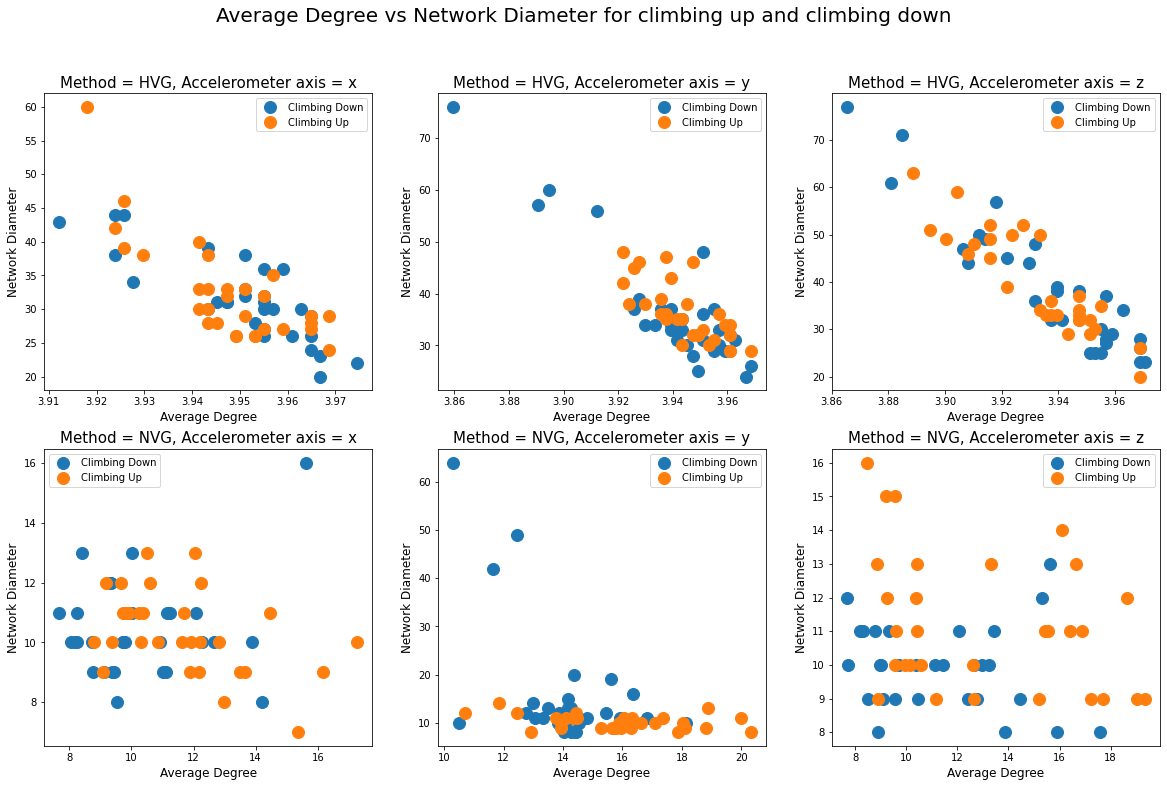

In [39]:
fig, axs = plt.subplots(2, 3)
fig.set_size_inches(20, 12)
fig.suptitle('Average Degree vs Network Diameter for climbing up and climbing down', fontsize=20)

method = ['HVG', 'NVG']
attr = ['x', 'y', 'z']

for i in range(2):
  for j in range(3):
    df_temp = pd_climbing.loc[(pd_climbing['Method'] == method[i]) & (pd_climbing['Accelerometer axis'] == attr[j])]
    groups = df_temp.groupby('Activity')
    for name, group in groups:
      axs[i, j].plot(group['Average Degree'], group['Network Diameter'], marker='o', linestyle='', markersize=12, label=name)
    axs[i, j].set_title(f'Method = {method[i]}, Accelerometer axis = {attr[j]}', fontsize=15)
    axs[i, j].set_xlabel('Average Degree', fontsize=12)
    axs[i, j].set_ylabel('Network Diameter', fontsize=12)
    axs[i, j].legend()

plt.show()

# Task 2

## Permutation entropy, complexity and results

Permutation entropy and complexity functions

In [32]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

Calculate the permutation entropy and complexity and append the result to a table. 12960 rows in total (15 subjects x 4 activities x 2 signal positions x 3 dimensions x 3 signal lengths x 4 embedded dimensions x 3 delays).

Expect long execution time (~ 45 seconds)

In [33]:
activity_pe_comp = []

for i in range(15):
  for attr in ['x', 'y', 'z']:
    for signal_length in range(3):
      for dim in range(3, 7):
        for delay in range(1, 4):
          for activity in [walking_head, walking_chest, running_head, running_chest, climbingup_head, climbingup_chest, climbingdown_head, climbingdown_chest]:
            row = []
            sig = 1024*(2**signal_length)
            op = ordinal_patterns(activity[i][f'attr_{attr}'][1000:1000+sig], dim, delay)
            #pe.append(p_entropy(op_sitting))
            #comp.append(complexity(op_sitting))
            row.append(i+1)
            row.append(attr)
            row.append(sig)
            row.append(dim)
            row.append(delay)
            row.append(p_entropy(op))
            row.append(complexity(op))
            if activity is walking_chest or activity is running_chest or activity is climbingup_chest or activity is climbingdown_chest:
              row.append("Chest")
            else:
              row.append("Head")
            if activity is walking_chest or activity is walking_head:
              row.append("Walking")
            elif activity is running_chest or activity is running_head:
              row.append("Running")
            elif activity is climbingup_chest or activity is climbingup_head:
              row.append("Climbing Up")
            else:
              row.append("Climbing Down")

            activity_pe_comp.append(row.copy())

In [ ]:
activity_pe_comp

In [35]:
df_activity_pe_comp = pd.DataFrame(activity_pe_comp, columns=['Subject', 'Accelerometer axis', 'Signal Length', 'Dimension', 'Delay', 'Permutation Entropy', 'Complexity', 'Signal Position', 'Activity'])
df_activity_pe_comp

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Signal Position,Activity
0,1,x,1024,3,1,0.848094,0.124252,Head,Walking
1,1,x,1024,3,1,0.835931,0.133484,Chest,Walking
2,1,x,1024,3,1,0.744359,0.168927,Head,Running
3,1,x,1024,3,1,0.900066,0.086750,Chest,Running
4,1,x,1024,3,1,0.783882,0.161235,Head,Climbing Up
...,...,...,...,...,...,...,...,...,...
12955,15,z,4096,6,3,0.904769,0.177747,Chest,Running
12956,15,z,4096,6,3,0.871401,0.226784,Head,Climbing Up
12957,15,z,4096,6,3,0.894230,0.192064,Chest,Climbing Up
12958,15,z,4096,6,3,0.913444,0.163542,Head,Climbing Down


## Scatter plot: permutation entropy vs complexity for walking and running 

In [40]:
df_activity_pe_comp_4096l_1d = df_activity_pe_comp.loc[(df_activity_pe_comp['Signal Length'] == 4096) & (df_activity_pe_comp['Delay'] == 1)]
df_activity_pe_comp_4096l_1d

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Signal Position,Activity
192,1,x,4096,3,1,0.810322,0.147205,Head,Walking
193,1,x,4096,3,1,0.818986,0.144768,Chest,Walking
194,1,x,4096,3,1,0.766624,0.159618,Head,Running
195,1,x,4096,3,1,0.896009,0.089837,Chest,Running
196,1,x,4096,3,1,0.812819,0.145781,Head,Climbing Up
...,...,...,...,...,...,...,...,...,...
12939,15,z,4096,6,1,0.884505,0.208988,Chest,Running
12940,15,z,4096,6,1,0.736348,0.291326,Head,Climbing Up
12941,15,z,4096,6,1,0.728100,0.302644,Chest,Climbing Up
12942,15,z,4096,6,1,0.859818,0.211468,Head,Climbing Down


In [41]:
df_activity_pe_comp_4096l_1d_rw = df_activity_pe_comp_4096l_1d.loc[(df_activity_pe_comp_4096l_1d['Activity'] == 'Running') | (df_activity_pe_comp_4096l_1d['Activity'] == 'Walking')]
df_activity_pe_comp_4096l_1d_rw

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Signal Position,Activity
192,1,x,4096,3,1,0.810322,0.147205,Head,Walking
193,1,x,4096,3,1,0.818986,0.144768,Chest,Walking
194,1,x,4096,3,1,0.766624,0.159618,Head,Running
195,1,x,4096,3,1,0.896009,0.089837,Chest,Running
216,1,x,4096,4,1,0.739724,0.221061,Head,Walking
...,...,...,...,...,...,...,...,...,...
12915,15,z,4096,5,1,0.863816,0.203535,Chest,Running
12936,15,z,4096,6,1,0.739851,0.284200,Head,Walking
12937,15,z,4096,6,1,0.761754,0.293139,Chest,Walking
12938,15,z,4096,6,1,0.916333,0.149427,Head,Running


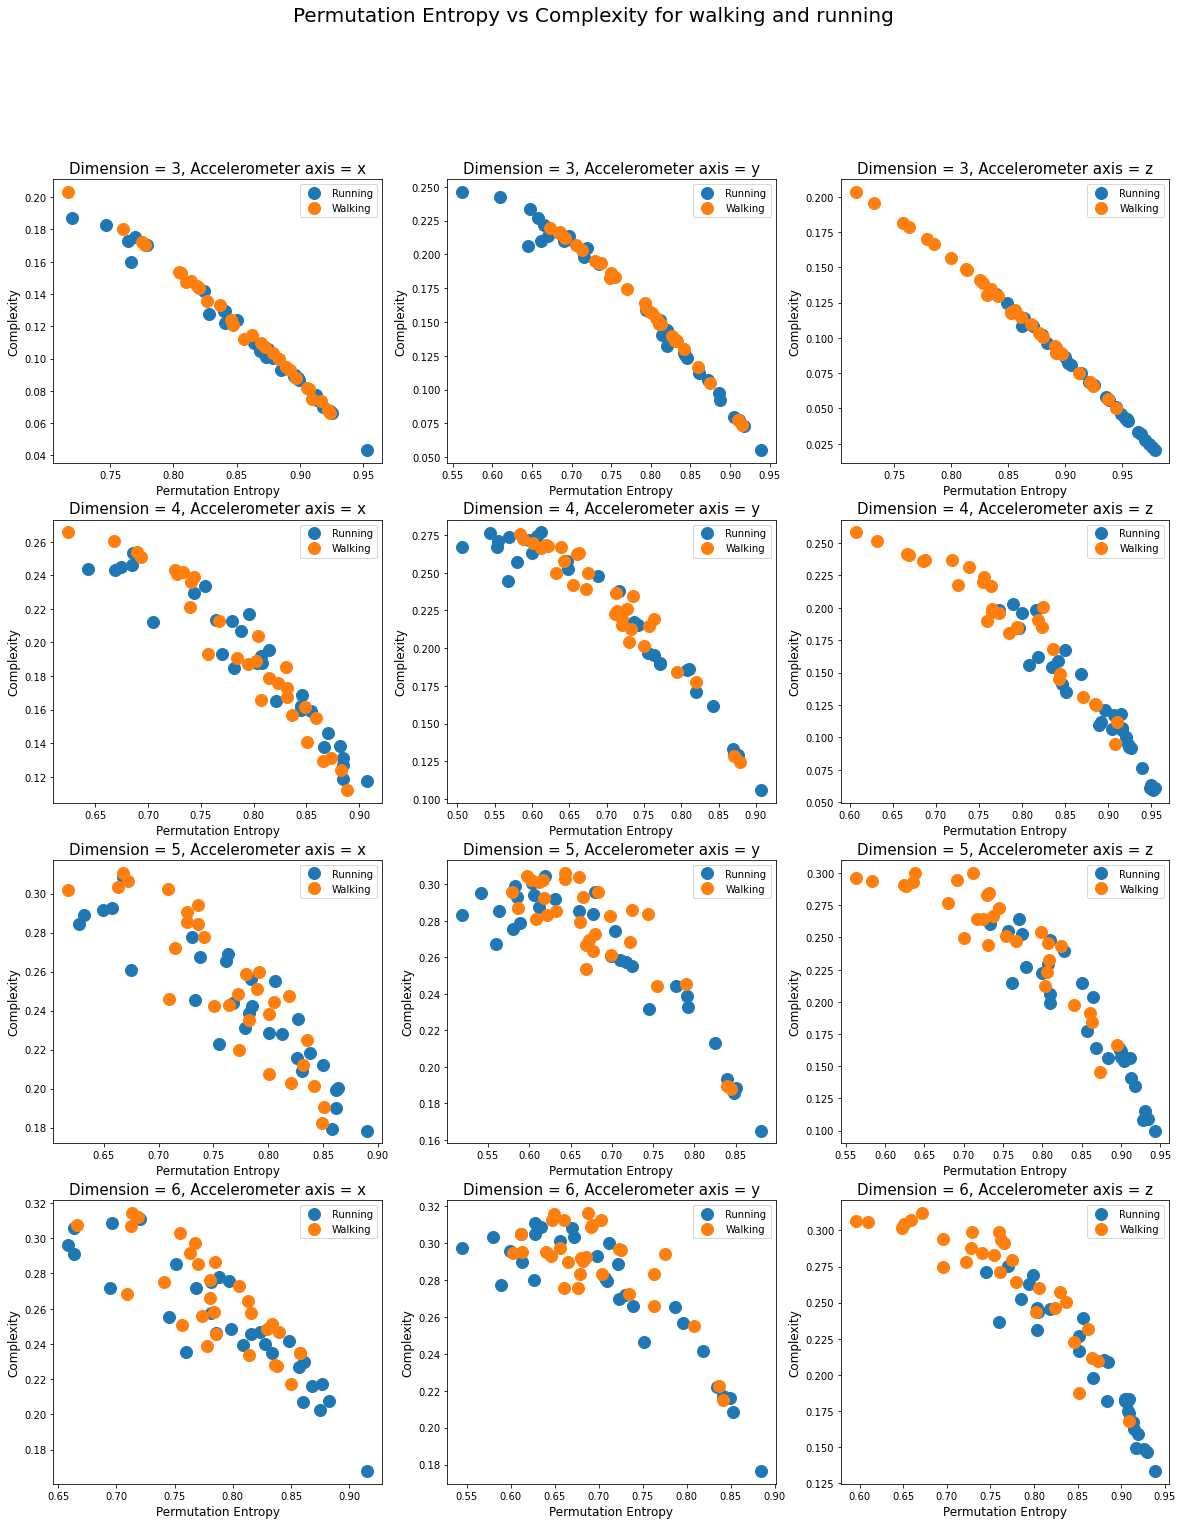

In [47]:
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(20, 24)
fig.suptitle('Permutation Entropy vs Complexity for walking and running', fontsize=20)

dim = [3, 4, 5, 6]
attr = ['x', 'y', 'z']

for i in range(4):
  for j in range(3):
    df_temp = df_activity_pe_comp_4096l_1d_rw.loc[(df_activity_pe_comp_4096l_1d_rw['Dimension'] == dim[i]) & (df_activity_pe_comp_4096l_1d_rw['Accelerometer axis'] == attr[j])]
    groups = df_temp.groupby('Activity')
    for name, group in groups:
      axs[i, j].plot(group['Permutation Entropy'], group['Complexity'], marker='o', linestyle='', markersize=12, label=name)
    axs[i, j].set_title(f'Dimension = {dim[i]}, Accelerometer axis = {attr[j]}', fontsize=15)
    axs[i, j].set_xlabel('Permutation Entropy', fontsize=12)
    axs[i, j].set_ylabel('Complexity', fontsize=12)
    axs[i, j].legend()

plt.show()

## Scatter plot: permutation entropy vs complexity for climbing up and climbing down

In [48]:
df_activity_pe_comp_4096l_1d_c = df_activity_pe_comp_4096l_1d.loc[(df_activity_pe_comp_4096l_1d['Activity'] == 'Climbing Up') | (df_activity_pe_comp_4096l_1d['Activity'] == 'Climbing Down')]
df_activity_pe_comp_4096l_1d_c

,Subject,Accelerometer axis,Signal Length,Dimension,Delay,Permutation Entropy,Complexity,Signal Position,Activity
196,1,x,4096,3,1,0.812819,0.145781,Head,Climbing Up
197,1,x,4096,3,1,0.811353,0.149750,Chest,Climbing Up
198,1,x,4096,3,1,0.849263,0.124218,Head,Climbing Down
199,1,x,4096,3,1,0.776764,0.170868,Chest,Climbing Down
220,1,x,4096,4,1,0.743646,0.218042,Head,Climbing Up
...,...,...,...,...,...,...,...,...,...
12919,15,z,4096,5,1,0.804797,0.247598,Chest,Climbing Down
12940,15,z,4096,6,1,0.736348,0.291326,Head,Climbing Up
12941,15,z,4096,6,1,0.728100,0.302644,Chest,Climbing Up
12942,15,z,4096,6,1,0.859818,0.211468,Head,Climbing Down


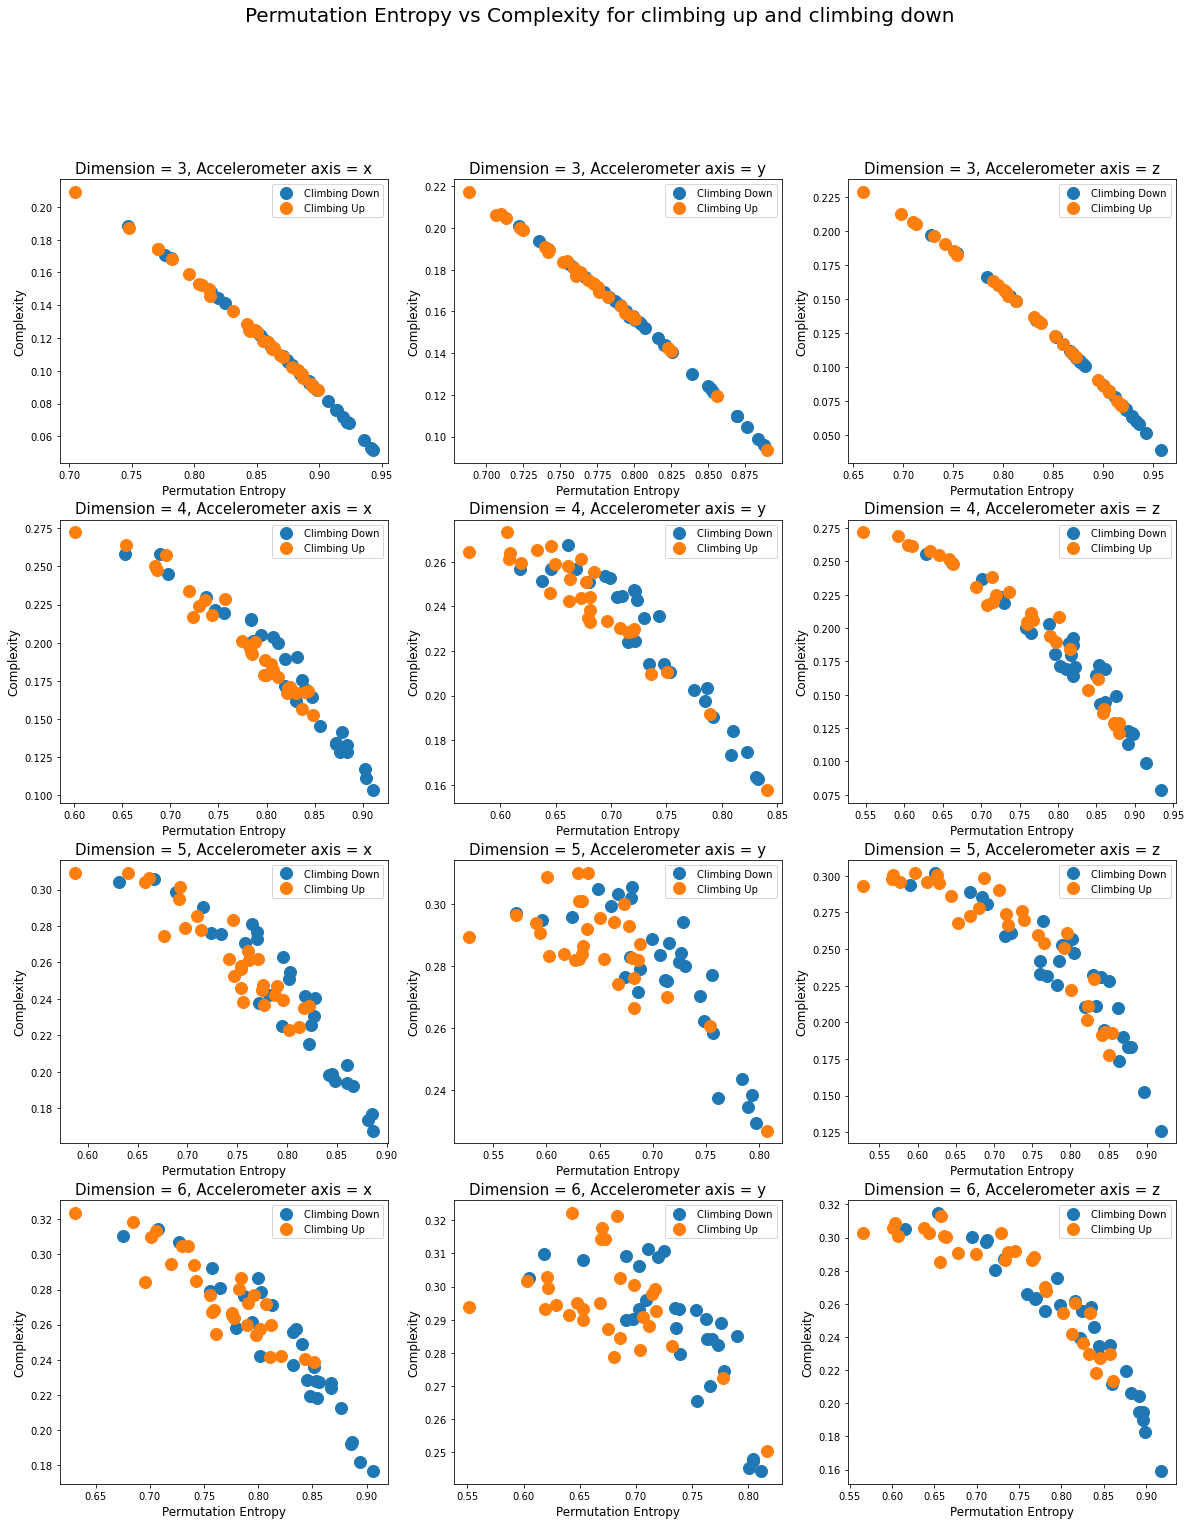

In [49]:
fig, axs = plt.subplots(4, 3)
fig.set_size_inches(20, 24)
fig.suptitle('Permutation Entropy vs Complexity for climbing up and climbing down', fontsize=20)

dim = [3, 4, 5, 6]
attr = ['x', 'y', 'z']

for i in range(4):
  for j in range(3):
    df_temp = df_activity_pe_comp_4096l_1d_c.loc[(df_activity_pe_comp_4096l_1d_c['Dimension'] == dim[i]) & (df_activity_pe_comp_4096l_1d_c['Accelerometer axis'] == attr[j])]
    groups = df_temp.groupby('Activity')
    for name, group in groups:
      axs[i, j].plot(group['Permutation Entropy'], group['Complexity'], marker='o', linestyle='', markersize=12, label=name)
    axs[i, j].set_title(f'Dimension = {dim[i]}, Accelerometer axis = {attr[j]}', fontsize=15)
    axs[i, j].set_xlabel('Permutation Entropy', fontsize=12)
    axs[i, j].set_ylabel('Complexity', fontsize=12)
    axs[i, j].legend()

plt.show()